In [1]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df_full = pd.read_csv('full_tfidf_df.csv')
df_full.drop(columns=['Unnamed: 0'], inplace=True)
df_full[['num_tokens','mention_count','url_count','hashtag_count']] = df_full[['num_tokens','mention_count','url_count','hashtag_count']].fillna(0)
df_full=df_full.astype('int')

In [4]:
df_full

,aa,aaaaaaaaand,aaahhhhh,aahahah,aaliyah,aap,aaron,aaronmacgruder,aaryn,ab,...,zoote,zrgrizz,zuko,zulema,zulu,zzzzzz,num_tokens,mention_count,url_count,hashtag_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
20617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,0


In [86]:
features = df_full.drop(columns = 'class')
labels = df_full['class']

### Learning Curve (for memory reasons, ran on another notebook)

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

CV = 10
train_sizes = np.arange(500, 18500,500).tolist()
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(max_iter = 100000),
X = features,
y = labels, train_sizes = train_sizes, cv = CV,
scoring = 'accuracy')

import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
train_error = 1- train_scores_mean 
validation_error = 1 - validation_scores_mean 

plt.style.use('seaborn')
plt.plot(train_sizes, train_error, label = 'Training error')
plt.plot(train_sizes, validation_error, label = 'Validation error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()

According to the learning curve, the validation error appears to increase after a training set of ~14500 (70%). Therefore, the optimal training size we'll use is 70%.

### Base logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
`
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 0)

clf = LogisticRegression(max_iter = 100000)
y_pred = clf.fit(X_train, y_train).predict(X_test)

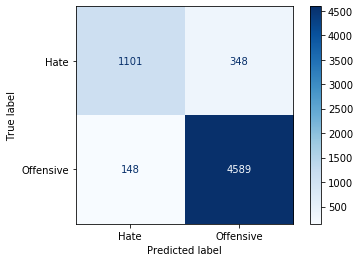

In [7]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Hate', 'Offensive']
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [8]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1449
           1       0.93      0.97      0.95      4737

    accuracy                           0.92      6186
   macro avg       0.91      0.86      0.88      6186
weighted avg       0.92      0.92      0.92      6186



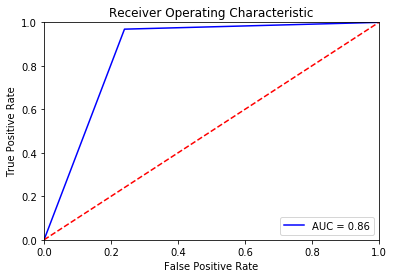

In [9]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using imblearn to balance samples

### Random Undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

kf = KFold(n_splits = 10, random_state = 0)
param_grid = [{}]
clf_cv = GridSearchCV(LogisticRegression(max_iter = 100000), param_grid, cv=kf)


under_pipeline = make_pipeline(RandomUnderSampler(random_state=0), clf_cv)

under_pipeline

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=0)),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                              estimator=LogisticRegression(max_iter=100000),
                              param_grid=[{}]))])

In [11]:
y_preds_under = under_pipeline.fit(X_train, y_train).predict(X_test)

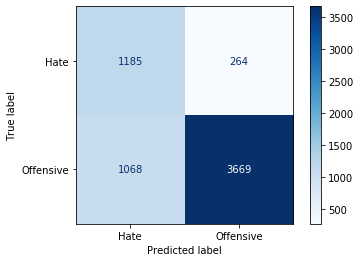

In [12]:
plot_confusion_matrix(under_pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [13]:
report = classification_report(y_test, y_preds_under)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.82      0.64      1449
           1       0.93      0.77      0.85      4737

    accuracy                           0.78      6186
   macro avg       0.73      0.80      0.74      6186
weighted avg       0.84      0.78      0.80      6186



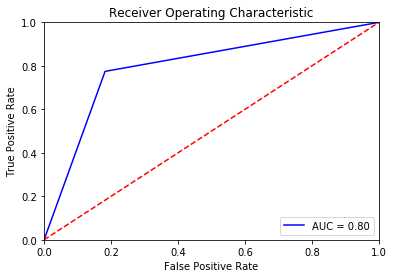

In [14]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds_under)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Oversampling

In [15]:
from imblearn.over_sampling import RandomOverSampler
 

param_grid = [{}]

over_pipeline = make_pipeline(RandomOverSampler(random_state=0), clf_cv)
over_pipeline

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=0)),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                              estimator=LogisticRegression(max_iter=100000),
                              param_grid=[{}]))])

In [16]:
y_preds_over = over_pipeline.fit(X_train, y_train).predict(X_test)

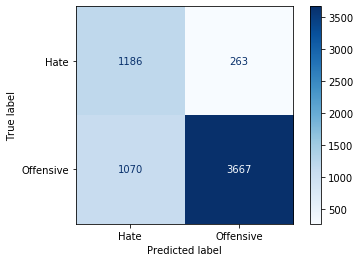

In [17]:
plot_confusion_matrix(over_pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [18]:
report = classification_report(y_test, y_preds_over)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.82      0.64      1449
           1       0.93      0.77      0.85      4737

    accuracy                           0.78      6186
   macro avg       0.73      0.80      0.74      6186
weighted avg       0.84      0.78      0.80      6186



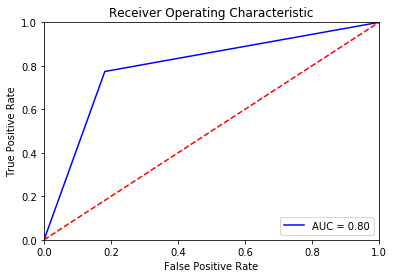

In [19]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds_over)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Near Miss undersampling

In [20]:
from imblearn.under_sampling import NearMiss

param_grid = [{}]
nm1 = NearMiss()
nearmiss1_pipeline = make_pipeline(nm1, clf_cv)

nearmiss1_pipeline

Pipeline(steps=[('nearmiss', NearMiss()),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                              estimator=LogisticRegression(max_iter=100000),
                              param_grid=[{}]))])

In [21]:
y_preds_nm1 = nearmiss1_pipeline.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

           0       0.48      0.83      0.61      1449
           1       0.93      0.73      0.82      4737

    accuracy                           0.75      6186
   macro avg       0.71      0.78      0.71      6186
weighted avg       0.83      0.75      0.77      6186



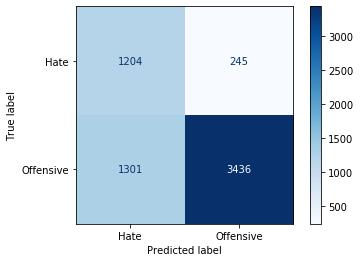

In [22]:
plot_confusion_matrix(nearmiss1_pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')
report = classification_report(y_test, y_preds_nm1)
print(report)

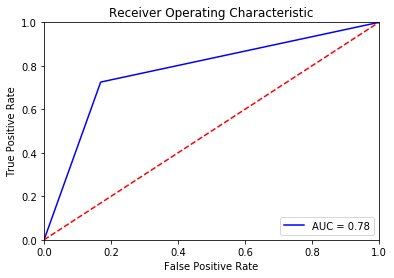

In [23]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds_nm1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE oversampling

In [24]:
from imblearn.over_sampling import SMOTE

param_grid = [{}]
smote_pipeline = make_pipeline(SMOTE(), clf_cv)

smote_pipeline

Pipeline(steps=[('smote', SMOTE()),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                              estimator=LogisticRegression(max_iter=100000),
                              param_grid=[{}]))])

              precision    recall  f1-score   support

           0       0.53      0.82      0.64      1449
           1       0.93      0.78      0.85      4737

    accuracy                           0.79      6186
   macro avg       0.73      0.80      0.75      6186
weighted avg       0.84      0.79      0.80      6186



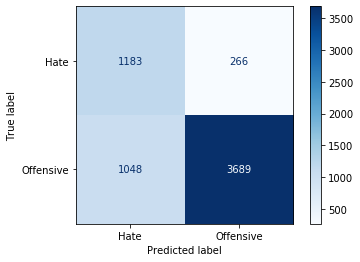

In [25]:
y_preds_smote = smote_pipeline.fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(smote_pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')
report = classification_report(y_test, y_preds_smote)
print(report)

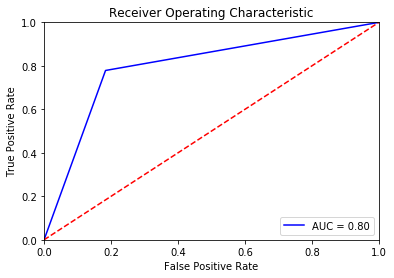

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds_smote)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Doesn't seem like balancing the dataset actually increases model performance.

### Grid Search - Hyperparameter Tuning for Logistic Regression

In [28]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}

grid_clf_acc = GridSearchCV(clf, param_grid = param_grid, cv=kf)
y_preds_grid = grid_clf_acc.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1449
           1       0.93      0.99      0.96      4737

    accuracy                           0.93      6186
   macro avg       0.94      0.87      0.90      6186
weighted avg       0.93      0.93      0.93      6186



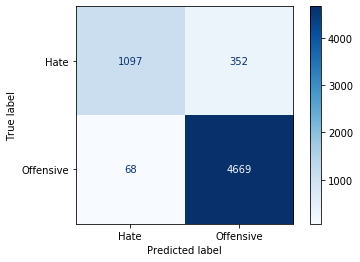

In [29]:
plot_confusion_matrix(grid_clf_acc, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')
report = classification_report(y_test, y_preds_grid)
print(report)

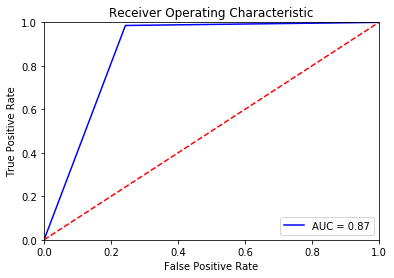

In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds_grid)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
grid_clf_acc.best_estimator_

LogisticRegression(C=0.001, max_iter=100000)

In [32]:
importance_logreg = grid_clf_acc.best_estimator_.coef_.tolist()[0]

feature_importance_logreg = pd.DataFrame(list(zip(features,importance_logreg)), columns =['features','importance'])
feature_importance_logreg = feature_importance_logreg.sort_values(by='importance')
feature_importance_logreg.head(10)

,features,importance
11983,hashtag_count,-0.016116
8319,pussy,-0.002975
3077,dyke,-0.000998
7163,nicca,-0.000982
2485,darkie,-0.000970
7180,nig,-0.000965
987,bitch,-0.000712
7164,niccas,-0.000317
11826,yass,-0.000317
2257,cracker,-0.000317


## Bagging, Boosting, and Stacking

In [33]:
best_clf = grid_clf_acc.best_estimator_

### Bagging

In [34]:
from sklearn.ensemble import BaggingClassifier
from scipy import stats

vanilla_scores = cross_val_score(best_clf, features, labels, cv=10)

In [35]:
samples_list = [0.1, 0.2, 0.3, 0.4]
bagging_scores = []
clfs = []
for i in range(len(samples_list)):
    print(i)
    bagging_clf = BaggingClassifier(best_clf, max_samples=samples_list[i], random_state=0) 
    clfs.append(bagging_clf)
    score = cross_val_score(bagging_clf, features, labels, cv=10)
    bagging_scores.append(score)
    print(score)

0
[0.94180407 0.88942774 0.8971872  0.90785645 0.92240543 0.9442289
 0.93743938 0.95392823 0.95538312 0.96168768]
1
[0.94180407 0.88942774 0.8971872  0.90785645 0.92240543 0.9442289
 0.93743938 0.95392823 0.95538312 0.96168768]
2
[0.94180407 0.88942774 0.8971872  0.90785645 0.92240543 0.9442289
 0.93743938 0.95392823 0.95538312 0.96168768]
3
[0.94180407 0.88942774 0.8971872  0.90785645 0.92240543 0.9442289
 0.93743938 0.95392823 0.95538312 0.96168768]


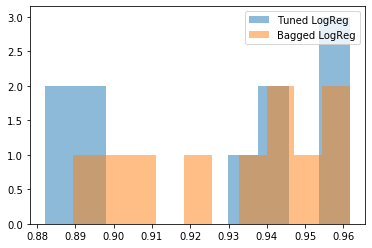

In [63]:
plt.hist(vanilla_scores,  alpha=0.5, label='Tuned LogReg')
plt.hist(bagging_scores[0],  alpha=0.5, label='Bagged LogReg')
plt.legend(loc='upper right')
plt.show()

In [62]:
print(stats.ttest_ind(bagging_scores[0], vanilla_scores))

Ttest_indResult(statistic=0.4737809401484407, pvalue=0.6413519547364437)


In [58]:
print(vanilla_scores.mean())
print(vanilla_scores.std())

0.9250242483026188
0.030157870447736736


In [61]:
print(bagging_scores[0].mean())
print(bagging_scores[0].std())

0.9311348205625606
0.02424054192006813


While bagging scores were slightly higher, there was no significant difference in accuracy between bagging and tuned logistic algorithm. Changing max_sample parameter had no effect.

### Voting

In [77]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
    
clf_array = [rf, et, knn, svc, rg]

# Set up voting
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg), ('Logistic Regression', best_clf)],voting='hard')

for clf, label in zip([rf, et, knn, svc, rg,eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, features, labels, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.939, std: (+/-) 0.018 [Random Forest]
Mean: 0.936, std: (+/-) 0.019 [Extra Trees]
Mean: 0.938, std: (+/-) 0.018 [KNeighbors]
Mean: 0.940, std: (+/-) 0.017 [SVC]
Mean: 0.935, std: (+/-) 0.019 [Ridge Classifier]
Mean: 0.940, std: (+/-) 0.017 [Ensemble]


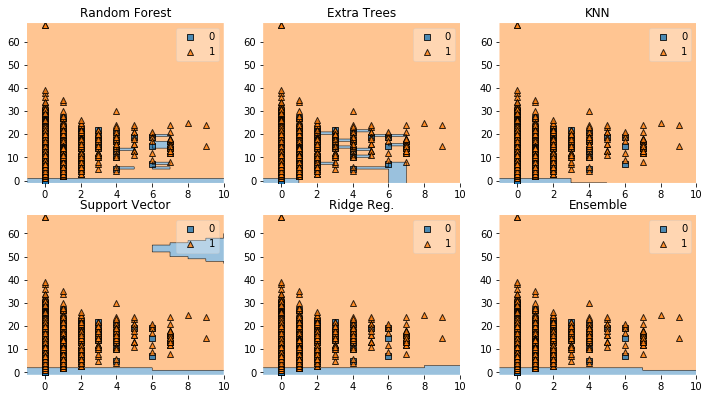

In [97]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(12, 10))
label = ['Random Forest', 'Extra Trees', 'KNN', 'Support Vector','Ridge Reg.', 'Ensemble']

for clf, lab, grd in zip([rf, et, knn, svc, rg, eclf], label, itertools.product([0, 1, 2], repeat = 2)):
    clf.fit(features[['hashtag_count', 'num_tokens']], labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(features[['hashtag_count', 'num_tokens']]), 
                                y=np.array(labels), clf=clf)
    plt.title(lab)

### Stacking

In [100]:
from itertools import combinations
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score


names = ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 0)

def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([list(map(list, combinations(arg, i))) for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])

stacked_clf_list = zip_stacked_classifiers(clf_array, names)
best_combination = [0.00, ""]
for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = 0, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(best_clf)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    #if accuracy > best_combination[0]:
     #   best_combination[0] = accuracy
    #    best_combination[1] = clf[1]
   # print("Accuracy score: {0:.3f} {1}").format(accuracy, clf[1])
    
#print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\seanx\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\seanx\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001BECC685270, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\seanx\anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\s...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001BECC685270, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\seanx\anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\s...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    659 
    660         If a global instance already exists, this reinitializes and starts it
    661         """
    662         app = cls.instance(**kwargs)
    663         app.initialize(argv)
--> 664         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    665 
    666 #-----------------------------------------------------------------------------
    667 # utility functions, for convenience
    668 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    578         if self.poller is not None:
    579             self.poller.start()
    580         self.kernel.start()
    581         self.io_loop = ioloop.IOLoop.current()
    582         try:
--> 583             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    584         except KeyboardInterrupt:
    585             pass
    586 
    587 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    148         except (RuntimeError, AssertionError):
    149             old_loop = None  # type: ignore
    150         try:
    151             self._setup_logging()
    152             asyncio.set_event_loop(self.asyncio_loop)
--> 153             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    154         finally:
    155             asyncio.set_event_loop(old_loop)
    156 
    157     def stop(self) -> None:

...........................................................................
C:\Users\seanx\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    533         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    534                                finalizer=self._asyncgen_finalizer_hook)
    535         try:
    536             events._set_running_loop(self)
    537             while True:
--> 538                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    539                 if self._stopping:
    540                     break
    541         finally:
    542             self._stopping = False

...........................................................................
C:\Users\seanx\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1777                         logger.warning('Executing %s took %.3f seconds',
   1778                                        _format_handle(handle), dt)
   1779                 finally:
   1780                     self._current_handle = None
   1781             else:
-> 1782                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop.add_...aconda3\lib\site-packages\tornado\ioloop.py:690>>
   1783         handle = None  # Needed to break cycles when an exception occurs.
   1784 
   1785     def _set_coroutine_origin_tracking(self, enabled):
   1786         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\seanx\anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop.add_future.<locals>.<lambda>(<Fut...naconda3\lib\site-packages\tornado\ioloop.py:690>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <function IOLoop.add_future.<locals>.<lambda>>
        self._args = (<Future finished result=(10, 162, <bound method....31CDE88>, <zmq.sugar.fr...001BED31CDA08>, ...]))>,)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\ioloop.py in <lambda>(f=<Future finished result=(10, 162, <bound method....31CDE88>, <zmq.sugar.fr...001BED31CDA08>, ...]))>)
    685             #
    686             # Wrap the callback in self._run_callback so we control
    687             # the error logging (i.e. it goes to tornado.log.app_log
    688             # instead of asyncio's log).
    689             future.add_done_callback(
--> 690                 lambda f: self._run_callback(functools.partial(callback, future))
        f = <Future finished result=(10, 162, <bound method....31CDE88>, <zmq.sugar.fr...001BED31CDA08>, ...]))>
    691             )
    692         else:
    693             assert is_future(future)
    694             # For concurrent futures, we use self.add_callback, so

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function Runner.handle_yield....1CDE88>, <zmq.sugar.fr...001BED31CDA08>, ...]))>))
    738         .. versionchanged:: 6.0
    739 
    740            CancelledErrors are no longer logged.
    741         """
    742         try:
--> 743             ret = callback()
        ret = undefined
        callback = functools.partial(<function Runner.handle_yield....1CDE88>, <zmq.sugar.fr...001BED31CDA08>, ...]))>)
    744             if ret is not None:
    745                 from tornado import gen
    746 
    747                 # Functions that return Futures typically swallow all

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\gen.py in inner(f=None)
    782         elif not self.future.done():
    783 
    784             def inner(f: Any) -> None:
    785                 # Break a reference cycle to speed GC.
    786                 f = None  # noqa: F841
--> 787                 self.run()
    788 
    789             self.io_loop.add_future(self.future, inner)
    790             return False
    791         return True

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\gen.py in run(self=<tornado.gen.Runner object>)
    743                         finally:
    744                             # Break up a reference to itself
    745                             # for faster GC on CPython.
    746                             exc_info = None
    747                     else:
--> 748                         yielded = self.gen.send(value)
        yielded = undefined
        self.gen.send = <built-in method send of generator object>
        value = (10, 162, <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>, (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]))
    749 
    750                 except (StopIteration, Return) as e:
    751                     self.finished = True
    752                     self.future = _null_future

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\kernelbase.py in process_one(self=<ipykernel.ipkernel.IPythonKernel object>, wait=True)
    356         else:
    357             try:
    358                 priority, t, dispatch, args = self.msg_queue.get_nowait()
    359             except QueueEmpty:
    360                 return None
--> 361         yield gen.maybe_future(dispatch(*args))
        dispatch = <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>
        args = (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    362 
    363     @gen.coroutine
    364     def dispatch_queue(self):
    365         """Coroutine to preserve order of message handling

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object Kernel.dispatch_shell>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 12, 20, 14, 46, 50, 571962, tzinfo=datetime.timezone.utc), 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'session': '25cdb9d2e16b4b85861613ebb4cb8619', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'parent_header': {}})
    263             try:
    264                 self.pre_handler_hook()
    265             except Exception:
    266                 self.log.debug("Unable to signal in pre_handler_hook:", exc_info=True)
    267             try:
--> 268                 yield gen.maybe_future(handler(stream, idents, msg))
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'25cdb9d2e16b4b85861613ebb4cb8619']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 12, 20, 14, 46, 50, 571962, tzinfo=datetime.timezone.utc), 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'session': '25cdb9d2e16b4b85861613ebb4cb8619', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'parent_header': {}}
    269             except Exception:
    270                 self.log.error("Exception in message handler:", exc_info=True)
    271             finally:
    272                 try:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [b'25cdb9d2e16b4b85861613ebb4cb8619'], {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 12, 20, 14, 46, 50, 571962, tzinfo=datetime.timezone.utc), 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'session': '25cdb9d2e16b4b85861613ebb4cb8619', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'parent_header': {}}), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object Kernel.execute_request>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'25cdb9d2e16b4b85861613ebb4cb8619'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 12, 20, 14, 46, 50, 571962, tzinfo=datetime.timezone.utc), 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'session': '25cdb9d2e16b4b85861613ebb4cb8619', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0137129743d14d668a145b3d3b0afe82', 'msg_type': 'execute_request', 'parent_header': {}})
    536             self._publish_execute_input(code, parent, self.execution_count)
    537 
    538         reply_content = yield gen.maybe_future(
    539             self.do_execute(
    540                 code, silent, store_history,
--> 541                 user_expressions, allow_stdin,
        user_expressions = {}
        allow_stdin = True
    542             )
    543         )
    544 
    545         # Flush output before sending the reply.

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\tornado\gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', False, True, {}, True), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object IPythonKernel.do_execute>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    295                     res = yield coro_future
    296             else:
    297                 # runner isn't already running,
    298                 # make synchronous call,
    299                 # letting shell dispatch to loop runners
--> 300                 res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        code = 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])'
        store_history = True
        silent = False
    301         finally:
    302             self._restore_input()
    303 
    304         if res.error_before_exec is not None:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])',), **kwargs={'silent': False, 'store_history': True})
    531             )
    532         self.payload_manager.write_payload(payload)
    533 
    534     def run_cell(self, *args, **kwargs):
    535         self._last_traceback = None
--> 536         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])',)
        kwargs = {'silent': False, 'store_history': True}
    537 
    538     def _showtraceback(self, etype, evalue, stb):
    539         # try to preserve ordering of tracebacks and print statements
    540         sys.stdout.flush()

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', store_history=True, silent=False, shell_futures=True)
   2853         result : :class:`ExecutionResult`
   2854         """
   2855         result = None
   2856         try:
   2857             result = self._run_cell(
-> 2858                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])'
        store_history = True
        silent = False
        shell_futures = True
   2859         finally:
   2860             self.events.trigger('post_execute')
   2861             if not silent:
   2862                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', store_history=True, silent=False, shell_futures=True)
   2881             runner = self.loop_runner
   2882         else:
   2883             runner = _pseudo_sync_runner
   2884 
   2885         try:
-> 2886             return runner(coro)
        runner = <function _pseudo_sync_runner>
        coro = <coroutine object InteractiveShell.run_cell_async>
   2887         except BaseException as e:
   2888             info = ExecutionInfo(raw_cell, store_history, silent, shell_futures)
   2889             result = ExecutionResult(info)
   2890             result.error_in_exec = e

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\async_helpers.py in _pseudo_sync_runner(coro=<coroutine object InteractiveShell.run_cell_async>)
     63 
     64     Credit to Nathaniel Smith
     65 
     66     """
     67     try:
---> 68         coro.send(None)
        coro.send = <built-in method send of coroutine object>
     69     except StopIteration as exc:
     70         return exc.value
     71     else:
     72         # TODO: do not raise but return an execution result with the right info.

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell_async(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from itertools import combinations\nfrom mlens.en....format(best_combination[1], best_combination[0])', store_history=True, silent=False, shell_futures=True)
   3058                 interactivity = "none" if silent else self.ast_node_interactivity
   3059                 if _run_async:
   3060                     interactivity = 'async'
   3061 
   3062                 has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
-> 3063                        interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   3064 
   3065                 self.last_execution_succeeded = not has_raised
   3066                 self.last_execution_result = result
   3067 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.FunctionDef object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-100-9e87c6b9e107>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1bed4e97348, executio...rue silent=False shell_futures=True> result=None>)
   3249                     elif mode == 'single':
   3250                         mod = ast.Interactive([node])
   3251                     with compiler.extra_flags(getattr(ast, 'PyCF_ALLOW_TOP_LEVEL_AWAIT', 0x0) if self.autoawait else 0x0):
   3252                         code = compiler(mod, cell_name, mode)
   3253                         asy = compare(code)
-> 3254                     if (await self.run_code(code, result,  async_=asy)):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001BED48C0C90, file "<ipython-input-100-9e87c6b9e107>", line 20>
        result = <ExecutionResult object at 1bed4e97348, executio...rue silent=False shell_futures=True> result=None>
        asy = False
   3255                         return True
   3256 
   3257             # Flush softspace
   3258             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001BED48C0C90, file "<ipython-input-100-9e87c6b9e107>", line 20>, result=<ExecutionResult object at 1bed4e97348, executio...rue silent=False shell_futures=True> result=None>, async_=False)
   3326                     code = compile('last_expr', 'fake', "single")
   3327                     exec(code, {'last_expr': last_expr})
   3328                 elif async_ :
   3329                     await eval(code_obj, self.user_global_ns, self.user_ns)
   3330                 else:
-> 3331                     exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001BED48C0C90, file "<ipython-input-100-9e87c6b9e107>", line 20>
        self.user_global_ns = {'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import jupyternotify\nip = get_ipython()\nip.register_magics(jupyternotify.JupyterNotifyMagics)', "import pandas as pd\nimport numpy as np\nfrom matp..._ipython().run_line_magic('matplotlib', 'inline')", "df_full = pd.read_csv('full_tfidf_df.csv')\ndf_fu..._count']].fillna(0)\ndf_full=df_full.astype('int')", 'df_full', "features = df_full.drop(columns = 'class')\nlabels = df_full['class']", 'from sklearn.linear_model import LogisticRegress..._pred = clf.fit(X_train, y_train).predict(X_test)', "from sklearn.metrics import plot_confusion_matri...display_labels = class_names, values_format = '')", 'from sklearn.metrics import classification_repor...assification_report(y_test, y_pred)\nprint(report)', "import sklearn.metrics as metrics\n\nfpr, tpr, thr...te')\nplt.xlabel('False Positive Rate')\nplt.show()", 'from imblearn.under_sampling import RandomUnderS...rSampler(random_state=0), clf_cv)\n\nunder_pipeline', 'y_preds_under = under_pipeline.fit(X_train, y_train).predict(X_test)', "plot_confusion_matrix(under_pipeline, X_test, y_...display_labels = class_names, values_format = '')", 'report = classification_report(y_test, y_preds_under)\nprint(report)', "fpr, tpr, threshold = metrics.roc_curve(y_test, ...te')\nplt.xlabel('False Positive Rate')\nplt.show()", 'from imblearn.over_sampling import RandomOverSam...verSampler(random_state=0), clf_cv)\nover_pipeline', 'y_preds_over = over_pipeline.fit(X_train, y_train).predict(X_test)', "plot_confusion_matrix(over_pipeline, X_test, y_t...display_labels = class_names, values_format = '')", 'report = classification_report(y_test, y_preds_over)\nprint(report)', "fpr, tpr, threshold = metrics.roc_curve(y_test, ...te')\nplt.xlabel('False Positive Rate')\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'NearMiss': <class 'imblearn.under_sampling._prototype_selection._nearmiss.NearMiss'>, 'Out': {4:        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 1              0  

[20620 rows x 11985 columns], 7: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 10: Pipeline(steps=[('randomundersampler', RandomUnd...                              param_grid=[{}]))]), 12: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 15: Pipeline(steps=[('randomoversampler', RandomOver...                              param_grid=[{}]))]), 17: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 20: Pipeline(steps=[('nearmiss', NearMiss()),
      ...                              param_grid=[{}]))]), 24: Pipeline(steps=[('smote', SMOTE()),
            ...                              param_grid=[{}]))]), 31: LogisticRegression(C=0.001, max_iter=100000), 32:             features  importance
11983  hashtag_...yass   -0.000317
2257         cracker   -0.000317, ...}, 'Pipeline': <class 'imblearn.pipeline.Pipeline'>, ...}
        self.user_ns = {'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import jupyternotify\nip = get_ipython()\nip.register_magics(jupyternotify.JupyterNotifyMagics)', "import pandas as pd\nimport numpy as np\nfrom matp..._ipython().run_line_magic('matplotlib', 'inline')", "df_full = pd.read_csv('full_tfidf_df.csv')\ndf_fu..._count']].fillna(0)\ndf_full=df_full.astype('int')", 'df_full', "features = df_full.drop(columns = 'class')\nlabels = df_full['class']", 'from sklearn.linear_model import LogisticRegress..._pred = clf.fit(X_train, y_train).predict(X_test)', "from sklearn.metrics import plot_confusion_matri...display_labels = class_names, values_format = '')", 'from sklearn.metrics import classification_repor...assification_report(y_test, y_pred)\nprint(report)', "import sklearn.metrics as metrics\n\nfpr, tpr, thr...te')\nplt.xlabel('False Positive Rate')\nplt.show()", 'from imblearn.under_sampling import RandomUnderS...rSampler(random_state=0), clf_cv)\n\nunder_pipeline', 'y_preds_under = under_pipeline.fit(X_train, y_train).predict(X_test)', "plot_confusion_matrix(under_pipeline, X_test, y_...display_labels = class_names, values_format = '')", 'report = classification_report(y_test, y_preds_under)\nprint(report)', "fpr, tpr, threshold = metrics.roc_curve(y_test, ...te')\nplt.xlabel('False Positive Rate')\nplt.show()", 'from imblearn.over_sampling import RandomOverSam...verSampler(random_state=0), clf_cv)\nover_pipeline', 'y_preds_over = over_pipeline.fit(X_train, y_train).predict(X_test)', "plot_confusion_matrix(over_pipeline, X_test, y_t...display_labels = class_names, values_format = '')", 'report = classification_report(y_test, y_preds_over)\nprint(report)', "fpr, tpr, threshold = metrics.roc_curve(y_test, ...te')\nplt.xlabel('False Positive Rate')\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'NearMiss': <class 'imblearn.under_sampling._prototype_selection._nearmiss.NearMiss'>, 'Out': {4:        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 1              0  

[20620 rows x 11985 columns], 7: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 10: Pipeline(steps=[('randomundersampler', RandomUnd...                              param_grid=[{}]))]), 12: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 15: Pipeline(steps=[('randomoversampler', RandomOver...                              param_grid=[{}]))]), 17: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object>, 20: Pipeline(steps=[('nearmiss', NearMiss()),
      ...                              param_grid=[{}]))]), 24: Pipeline(steps=[('smote', SMOTE()),
            ...                              param_grid=[{}]))]), 31: LogisticRegression(C=0.001, max_iter=100000), 32:             features  importance
11983  hashtag_...yass   -0.000317
2257         cracker   -0.000317, ...}, 'Pipeline': <class 'imblearn.pipeline.Pipeline'>, ...}
   3332             finally:
   3333                 # Reset our crash handler in place
   3334                 sys.excepthook = old_excepthook
   3335         except SystemExit as e:

...........................................................................
C:\Users\seanx\OneDrive\Desktop\YORK ML\ML1010\twitter_hate_speech\notebooks\<ipython-input-100-9e87c6b9e107> in <module>()
     22     ensemble = SuperLearner(scorer = accuracy_score, 
     23                             random_state = 0, 
     24                             folds = 10)
     25     ensemble.add(clf[0])
     26     ensemble.add_meta(best_clf)
---> 27     ensemble.fit(X_train, y_train)
     28     preds = ensemble.predict(X_test)
     29     accuracy = accuracy_score(preds, y_test)
     30     
     31     #if accuracy > best_combination[0]:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\ensemble\base.py in fit(self=SuperLearner(array_check=None, backend=None, fol...BED24230D8>,
       shuffle=False, verbose=False), X=       aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns], y=2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32, **kwargs={})
    509             return self
    510 
    511         if self.model_selection:
    512             self._id_train.fit(X)
    513 
--> 514         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...rmers=[])],
   verbose=0)],
      verbose=False)>
        X =        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns]
        y = 2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32
        kwargs = {}
    515         if out is not self._backend:
    516             # fit_transform
    517             return out
    518         else:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\ensemble\base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), X=       aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns], y=2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32, **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        X =        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns]
        y = 2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), job='fit', X=       aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns], y=2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32, path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), args={'auxiliary': {'P': None, 'X':        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns], 'y': 2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32}, 'dir': [], 'job': 'fit', 'main': {'P': array([[0.],
       [0.],
       [0.],
       .....  [0.],
       [0.],
       [0.]], dtype=float32), 'X':        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns], 'y': 2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict', backend='threading', dty...=<function accuracy_score at 0x000001BED24230D8>)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Sun Dec 20 10:53:21 2020
PID: 19972                Python 3.7.6: C:\Users\seanx\anaconda3\python.exe
...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\learner.py in __call__(self=<mlens.parallel.learner.SubLearner object>)
    119         else:
    120             self.processing_index = ''
    121 
    122     def __call__(self):
    123         """Launch job"""
--> 124         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubLearner object>
        self.job = 'fit'
    125 
    126     def fit(self, path=None):
    127         """Fit sub-learner"""
    128         if path is None:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\learner.py in fit(self=<mlens.parallel.learner.SubLearner object>, path=[])
    128         if path is None:
    129             path = self.path
    130         t0 = time()
    131         transformers = self._load_preprocess(path)
    132 
--> 133         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.SubLearner object>>
        transformers = None
    134 
    135         if self.out_array is not None:
    136             self._predict(transformers, self.scorer is not None)
    137 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\mlens\parallel\learner.py in _fit(self=<mlens.parallel.learner.SubLearner object>, transformers=None)
    174         t0 = time()
    175         if transformers:
    176             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    177 
    178         # Fit estimator
--> 179         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method RidgeClassifier.fit of RidgeClassifier()>
        xtemp =        aa  aaaaaaaaand  aaahhhhh  aahahah  aaliy... 0              1  

[14434 rows x 11984 columns]
        ytemp = 2767     1
14583    1
15683    1
1217     1
1258...32     1
Name: class, Length: 14434, dtype: int32
    180         self.fit_time_ = time() - t0
    181 
    182     def _load_preprocess(self, path):
    183         """Load preprocessing pipeline"""

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py in fit(self=RidgeClassifier(), X=array([[0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]]), y=array([1, 1, 1, ..., 1, 1, 1]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.]))
    940         if self.class_weight:
    941             # modify the sample weights with the corresponding class weight
    942             sample_weight = (sample_weight *
    943                              compute_sample_weight(self.class_weight, y))
    944 
--> 945         super().fit(X, Y, sample_weight=sample_weight)
        X = array([[0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]])
        Y = array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])
        sample_weight = array([1., 1., 1., ..., 1., 1., 1.])
    946         return self
    947 
    948     @property
    949     def classes_(self):

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py in fit(self=RidgeClassifier(), X=array([[ 0.        ,  0.        ,  0.        , ....  0.2545379 ,
        -0.08597755,  0.91028128]]), y=array([[0.45642234],
       [0.45642234],
      ...2234],
       [0.45642234],
       [0.45642234]]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.]))
    592 
    593             self.coef_, self.n_iter_ = _ridge_regression(
    594                 X, y, alpha=self.alpha, sample_weight=sample_weight,
    595                 max_iter=self.max_iter, tol=self.tol, solver=solver,
    596                 random_state=self.random_state, return_n_iter=True,
--> 597                 return_intercept=False, check_input=False, **params)
        params = {}
    598             self._set_intercept(X_offset, y_offset, X_scale)
    599 
    600         return self
    601 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py in _ridge_regression(X=array([[ 0.        ,  0.        ,  0.        , ....  0.2545379 ,
        -0.08597755,  0.91028128]]), y=array([[0.45642234],
       [0.45642234],
      ...2234],
       [0.45642234],
       [0.45642234]]), alpha=array([1.]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.]), solver='cholesky', max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=True, return_intercept=False, X_scale=None, X_offset=None, check_input=False)
    466             except linalg.LinAlgError:
    467                 # use SVD solver if matrix is singular
    468                 solver = 'svd'
    469         else:
    470             try:
--> 471                 coef = _solve_cholesky(X, y, alpha)
        coef = undefined
        X = array([[ 0.        ,  0.        ,  0.        , ....  0.2545379 ,
        -0.08597755,  0.91028128]])
        y = array([[0.45642234],
       [0.45642234],
      ...2234],
       [0.45642234],
       [0.45642234]])
        alpha = array([1.])
    472             except linalg.LinAlgError:
    473                 # use SVD solver if matrix is singular
    474                 solver = 'svd'
    475 

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py in _solve_cholesky(X=array([[ 0.        ,  0.        ,  0.        , ....  0.2545379 ,
        -0.08597755,  0.91028128]]), y=array([[0.45642234],
       [0.45642234],
      ...2234],
       [0.45642234],
       [0.45642234]]), alpha=array([1.]))
    143     one_alpha = np.array_equal(alpha, len(alpha) * [alpha[0]])
    144 
    145     if one_alpha:
    146         A.flat[::n_features + 1] += alpha[0]
    147         return linalg.solve(A, Xy, sym_pos=True,
--> 148                             overwrite_a=True).T
    149     else:
    150         coefs = np.empty([n_targets, n_features], dtype=X.dtype)
    151         for coef, target, current_alpha in zip(coefs, Xy.T, alpha):
    152             A.flat[::n_features + 1] += current_alpha

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\scipy\linalg\basic.py in solve(a=array([[ 1.00000000e+00,  0.00000000e+00,  0.000...34373424e+02,  3.58659069e+02,  3.88181426e+03]]), b=array([[   0.        ],
       [   0.        ],
...
       [ 418.42011916],
       [ 361.06692532]]), sym_pos=True, lower=False, overwrite_a=True, overwrite_b=False, debug=None, check_finite=True, assume_a='gen', transposed=False)
    134     LAPACK respectively.
    135     """
    136     # Flags for 1D or nD right hand side
    137     b_is_1D = False
    138 
--> 139     a1 = atleast_2d(_asarray_validated(a, check_finite=check_finite))
        a1 = undefined
        a = array([[ 1.00000000e+00,  0.00000000e+00,  0.000...34373424e+02,  3.58659069e+02,  3.88181426e+03]])
        check_finite = True
    140     b1 = atleast_1d(_asarray_validated(b, check_finite=check_finite))
    141     n = a1.shape[0]
    142 
    143     overwrite_a = overwrite_a or _datacopied(a1, a)

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\scipy\_lib\_util.py in _asarray_validated(a=array([[ 1.00000000e+00,  0.00000000e+00,  0.000...34373424e+02,  3.58659069e+02,  3.88181426e+03]]), check_finite=True, sparse_ok=False, objects_ok=False, mask_ok=False, as_inexact=False)
    241             raise ValueError(msg)
    242     if not mask_ok:
    243         if np.ma.isMaskedArray(a):
    244             raise ValueError('masked arrays are not supported')
    245     toarray = np.asarray_chkfinite if check_finite else np.asarray
--> 246     a = toarray(a)
        a = array([[ 1.00000000e+00,  0.00000000e+00,  0.000...34373424e+02,  3.58659069e+02,  3.88181426e+03]])
        toarray = <function asarray_chkfinite>
    247     if not objects_ok:
    248         if a.dtype is np.dtype('O'):
    249             raise ValueError('object arrays are not supported')
    250     if as_inexact:

...........................................................................
C:\Users\seanx\anaconda3\lib\site-packages\numpy\lib\function_base.py in asarray_chkfinite(a=array([[ 1.00000000e+00,  0.00000000e+00,  0.000...34373424e+02,  3.58659069e+02,  3.88181426e+03]]), dtype=None, order=None)
    492     ...
    493     ValueError
    494 
    495     """
    496     a = asarray(a, dtype=dtype, order=order)
--> 497     if a.dtype.char in typecodes['AllFloat'] and not np.isfinite(a).all():
        a.dtype.char = 'd'
        a.all = <built-in method all of numpy.ndarray object>
    498         raise ValueError(
    499             "array must not contain infs or NaNs")
    500     return a
    501 

MemoryError: Unable to allocate 137. MiB for an array with shape (11984, 11984) and data type bool
___________________________________________________________________________